# <font color='red'>Clustering Assignment</font>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving movie_actor_network.csv to movie_actor_network.csv


**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
#!pip install networkx==2.3
#!pip uninstall networkx -y
#!pip install networkx==2.5.1
#!python3 -m pip install networkx

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [ ]:
!pip install stellargraph

In [4]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [5]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [6]:
edges = [tuple(x) for x in data.values.tolist()]  # Here x is series (ie denoting each row's values in a series format)

In [7]:
edges[0]  # (Movie_i, Actor_i) := Movie <-> Actor

('m1', 'a1')

In [8]:
data.head(2)

,movie,actor
0,m1,a1
1,m2,a1


In [9]:
# Prepare the Bipartite Graph (Movie <-> Actor)
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [10]:
# ref :
# https://stackoverflow.com/questions/61154740/attributeerror-module-networkx-has-no-attribute-connected-component-subgraph
# https://networkx.org/documentation/networkx-2.1/reference/algorithms/generated/networkx.algorithms.components.connected_component_subgraphs.html

#A = list(nx.connected_component_subgraphs(B))[0]
subgraphs = [B.subgraph(c) for c in nx.connected_components(B)]

In [11]:
subgraph = subgraphs[0]
print("number of nodes", subgraph.number_of_nodes())
print("number of edges", subgraph.number_of_edges())

number of nodes 4703
number of edges 9650


**Observations**: 

As the #nodes < #edges, 
So we can say that either more movies are associated to an actor
or more actors are associated to a movie

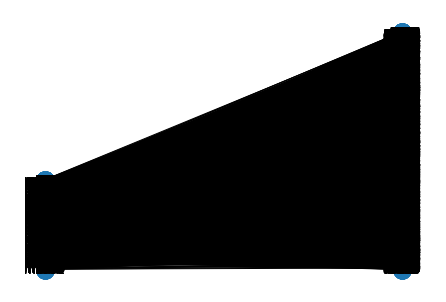

In [12]:
l, r = nx.bipartite.sets(subgraph)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(subgraph, pos=pos, with_labels=True)
plt.show()

In [13]:
movies = []
actors = []
# NOTE : This we are checking for only 1 connected sub-component of entire Movie-Actor Bipartite Graph
for i in subgraph.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies in current subgraph', len(movies))
print('number of actors in current subgraph', len(actors))

number of movies in current subgraph 1292
number of actors in current subgraph 3411


In [14]:
# For Feature Embedding (Feature Engineering)

# NOTE : Here we are generating walks/paths from only 1 sub-connected-graph from Bipartite(Movie<->Actor)

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(subgraph))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(subgraph.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


Observation :  

The path generated = number of nodes in subgraph
Thus each node as starting node is considered for path

Feature Embeddings

Each Walk will be represented as 128 size vector

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [17]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

NOTE:
We only need node-id to get information about node in corresponding Graph

In [18]:
# testing (retrieving the node based on id from connected sub-graph)
subgraph.nodes['a973']  # Node with id {a973} belongs to group-1 & labeled{actor}

{'bipartite': 1, 'label': 'actor'}

In [19]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality

# ref : https://stackoverflow.com/questions/58518554/attributeerror-graph-object-has-no-attribute-node

node_targets = [subgraph.nodes[node_id]['label'] for node_id in node_ids]

In [20]:
print(node_ids[:3])
print(node_targets[:3])

['a973', 'a967', 'a964']
['actor', 'actor', 'actor']


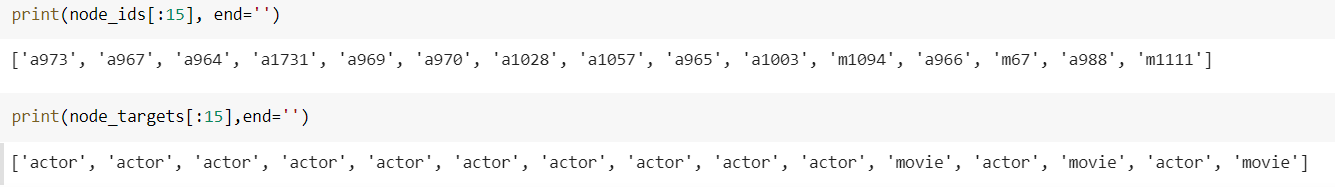

In [21]:
np.unique(node_targets)

array(['actor', 'movie'], dtype='<U5')

In [22]:
def data_split(node_ids, node_targets, node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes
    for lbl, nodeId, vec in zip(node_targets, node_ids, node_embeddings):
      if lbl == 'actor':
        actor_nodes.append(nodeId)
        actor_embeddings.append(vec)
      else:
        movie_nodes.append(nodeId)
        movie_embeddings.append(vec)

    return actor_nodes, movie_nodes, actor_embeddings, movie_embeddings


<font color='cyan'>Grader function - 1</font>

In [23]:
actor_nodes, movie_nodes, actor_embeddings, movie_embeddings = data_split(node_ids, node_targets, node_embeddings)

In [24]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [25]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [26]:
# ref
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
# https://stackoverflow.com/questions/64663894/attributeerror-set-object-has-no-attribute-number-of-nodes-working-with-net

def cost1(graph, number_of_clusters):
    '''In this function, we will calculate cost1'''
    # NOTE :- graph := 1 such cluster = cluster_i
    # & this graph is bipartite graph

    total = graph.number_of_nodes()

    # Max Size (ie #nodes) of largest connected components
    largest_cc  = max(nx.connected_components(graph), key=len)
    size = len(largest_cc)
    
    return (1/number_of_clusters)*(size/total) 

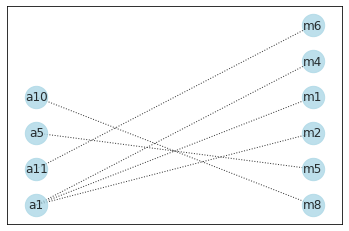

In [38]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

In [39]:
from networkx.algorithms import bipartite

In [40]:
# TESTING (PRACTICE)
nx.is_connected(graded_graph)


False

In [ ]:
# # TESTING (PRACTICE)
# dict(graded_graph.degree)

In [ ]:
# # TESTING (PRACTICE)
# # https://networkx.org/documentation/stable/reference/algorithms/bipartite.html
# G = nx.complete_bipartite_graph(3, 2)
# left, right = bipartite.sets(G)
# left, right

In [ ]:
# # TESTING (PRACTICE)
# # https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.bipartite.basic.degrees.html#networkx.algorithms.bipartite.basic.degrees

# degX, degY = bipartite.degrees(G, right)
# print(dict(degX)) 
# print(dict(degY))

In [ ]:
# # TESTING (PRACTICE)
# left = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
# right = set(G) - left
# left, right

In [ ]:
# # TESTING (PRACTICE)
# d = dict(G.degree)
# print(d)


<font color='cyan'>Grader function - 3</font>

In [28]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [65]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    # NOTE : Here {graph} is actually a 1 cluster only & not an entire graph
    # Now this cluster can have many sub connected components
    left = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
    right = set(graph) - left
    degs = sum(map(dict(graph.degree).get, left))
    return (1/number_of_clusters) * (degs/len(right))

# def cost2(graph,number_of_clusters):
#     '''In this function, we will calculate cost1'''
#     # NOTE : Here {graph} is actually a 1 cluster only & not an entire graph
#     # Now this cluster can have many sub connected components
#     left = {n for n, d in graph.nodes(data=True) if d["bipartite"] == 0}
#     right = set(graph) - left
#     degs = sum(map(dict(graph.degree).get, left))
#     return (1/number_of_clusters) * (degs/len(right))

<font color='cyan'>Grader function - 4</font>

In [66]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

**HELPERS**

In [67]:
from sklearn.cluster import KMeans

In [74]:
from itertools import compress
from functools import partial
from operator import eq

def decide_k_for_grouping(nodes, mat):
  ''' Hyper Param Tuning for KMeans Clustering 
      :nodes: list of nodes id 
      :mat: vector representation of those nodes
  '''
  K = [3, 5, 10, 50, 200, 300]  # Hyper-Param
  scores = []
  # 1. Fit
  for k in K:  # k := no. of clusters

    # 1. train 
    marker = KMeans(k)
    marker.fit(mat)

    cost_1 = cost_2 = 0

    # 2. Loss/Cost
    for lbl in range(k):      # k clusters
      # lbl := label for current cluster

      # cluster-{lbl}
      G = nx.Graph()  #-> Graph for cluster
      # 2.1. Find node members in cluster-i
      members = compress(nodes, map(partial(eq, lbl), marker.labels_))

      # 2.2 Computing cost for each node
      for actor in members:
        # find all surrounding movies nodes to this {node} as centered
        neigh_movies_graph = nx.ego_graph(B, actor)
        # Add these surrounding movies nodes info to current graph's cluster
        movies = neigh_movies_graph.nodes
        actor_to_movies = neigh_movies_graph.edges()
        G.add_nodes_from([actor], bipartite=0) # adding nodes 
        G.add_nodes_from(movies, bipartite=1) # adding nodes 
        G.add_edges_from(actor_to_movies) # adding edges 

      # 2.3. Find metric for current cluster (ie Cost)
      cost_1 += cost1(G, k)
      cost_2 += cost2(G, k) 
    
    # 3. Score when no. of clusters = k
    score = cost_1 * cost_2
    scores.append(score)

  # Best Score 
  i = np.argmax(scores)  # Find best K corresp to best score
  return K[i]

In [96]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

def viz_scatter_plot(mat, labels, k):
  ''' Scatter Plot after trasnforming features from d dimen to 2 dimen '''

  # Feature Transformer
  x, y = len(mat), len(mat[0])
  print(f'transforming from {x, y} to {x, 2}')
  transformer = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
  res = transformer.fit_transform(mat)  # converting from (n, k) -> (n, 2)

  col1, col2 = res[:,0], res[:,1]
  plt.figure(figsize=(8, 6))
  # plt.scatter(col1, col2, c=labels)
  plt.title('2D Visualisation')

  # plt.figure(figsize=(16,10))
  sns.scatterplot(
      x=col1, 
      y=col2,
      hue=labels,
      palette=sns.color_palette("hls", k),
      legend="full",
      alpha=0.3
  )
  plt.show()


<font color='blue'>Grouping similar actors</font>

In [94]:
bK = decide_k_for_grouping(actor_nodes, actor_embeddings)
print('Decided k in k-means : ', bK)

labeller = KMeans(bK)
labeller.fit(actor_embeddings)

Decided k in k-means :  3


KMeans(n_clusters=3)

In [ ]:
#len(labels), len(actor_nodes)

<font color='blue'>Displaying similar actor clusters</font>

transforming from (3411, 128) to (3411, 2)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3411 samples in 0.001s...
[t-SNE] Computed neighbors for 3411 samples in 0.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3411
[t-SNE] Computed conditional probabilities for sample 2000 / 3411
[t-SNE] Computed conditional probabilities for sample 3000 / 3411
[t-SNE] Computed conditional probabilities for sample 3411 / 3411
[t-SNE] Mean sigma: 0.627668
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.657715
[t-SNE] KL divergence after 300 iterations: 1.690634


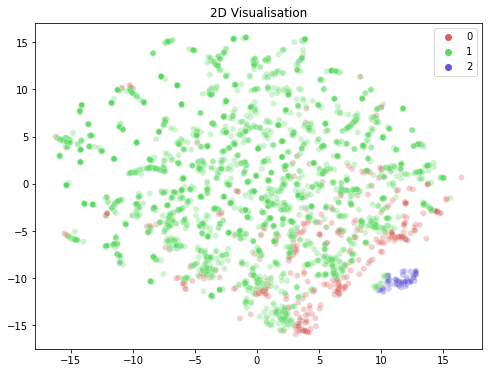

In [97]:
labels = labeller.labels_
viz_scatter_plot(actor_embeddings, labels, bK)

<font color='blue'>Grouping similar movies</font>

In [98]:
bK = decide_k_for_grouping(movie_nodes, movie_embeddings)
print('Decided k in k-means : ', bK)

labeller = KMeans(bK)
labeller.fit(movie_embeddings)

Decided k in k-means :  3


KMeans(n_clusters=3)

<font color='blue'>Displaying similar movie clusters</font>

transforming from (1292, 128) to (1292, 2)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1292 samples in 0.001s...
[t-SNE] Computed neighbors for 1292 samples in 0.081s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1292
[t-SNE] Computed conditional probabilities for sample 1292 / 1292
[t-SNE] Mean sigma: 1.376903
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.443291
[t-SNE] KL divergence after 300 iterations: 1.164645


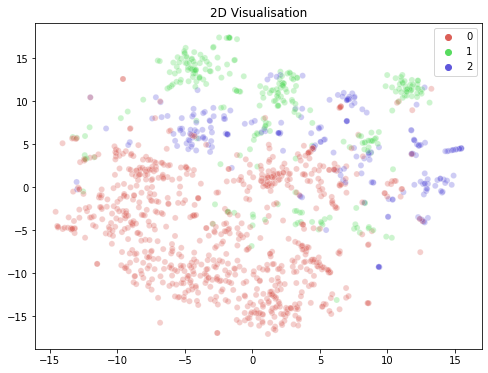

In [99]:
labels = labeller.labels_
viz_scatter_plot(movie_embeddings, labels, bK)